In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
#url = "http://h1bdata.info/index.php?em={}".format('Toyota')
#url

In [4]:
#url
#type(url)
#content = requests.get(url).text
#type(content)
#content

In [5]:
#soup = BeautifulSoup(content, "html.parser")
#type(soup)
#table = soup.find("tbody")
#print(table)

http://h1bdata.info

In [6]:
def collect_tables(target):
    # access website, populate form, get results as html
    url = "http://h1bdata.info/index.php?em={}".format(target)
    content = requests.get(url).text
    
    #process the html code
    soup = BeautifulSoup(content)
    table = soup.find("tbody")  #go to table body
    colnames = [tag.text for tag in soup.find("thead").find_all("th")]  #fetch Column headers

    #cycle through tags and populate df with contents
    df = pd.DataFrame(
        ((tag.text for tag in lst.find_all("td")) for lst in table.find_all("tr")),
        columns = colnames
    )
    return df

### Invoke Function to Read and Process URL

In [68]:
targets = ["Bloomberg", "Factset", "Thomson", 'Intercontinental Exchange', 'Intercontinentalexchange', 'NYSE', 'Fidessa', 'Markit']
collection = [collect_tables(target) for target in targets]

C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\traveler\Anaconda3\envs\py35\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


### Explore

In [69]:
#print(collection[0].shape)
#type(collection[0].head())
collection[0].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,BLOOMBERG LP,ABAP DEVELOPER,"135,000","NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED
1,BLOOMBERG LP,ABAP DEVELOPER,"145,000","NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED
2,BLOOMBERG LP,ACCOUNT MANAGER,"87,500","NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED
3,BLOOMBERG LP,ACCOUNT MANAGER,"89,500","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED
4,BLOOMBERG LP,ACCOUNT MANAGER,"100,000","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED


In [70]:
print(collection[1].shape)
collection[1].head()

(653, 7)


,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,FACTSET RESEARCH SYSTEMS INC,AMERICAS GLOBAL BANKS GBB STRATEGIC CONSULTANT,"63,086","NEW YORK, NY",03/10/2015,09/05/2015,CERTIFIED
1,FACTSET RESEARCH SYSTEMS INC,ANALYTICS RESEARCH ASSISTANT,"96,000","NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED
2,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"37,100","YOUNGSTOWN, OH",03/09/2017,08/24/2017,CERTIFIED
3,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/09/2015,04/20/2015,CERTIFIED
4,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/07/2014,10/02/2014,CERTIFIED


### Combine

In [71]:
df = pd.concat(collection).reset_index(drop=True)
df.tail()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
4564,MARKIT NORTH AMERICA INC D/B/A IHS MARKIT,"VP, SQL DEVELOPER","91,229","BOULDER, CO",06/23/2017,09/18/2017,CERTIFIED
4565,MARKIT NORTH AMERICA INC D/B/A IHS MARKIT,"VP, SQL DEVELOPER","91,229","BOULDER, CO",07/13/2017,07/13/2017,CERTIFIED
4566,MARKIT NORTH AMERICA INC,VP- QUANTITATIVE SPECIALIST,"66,290","NAPERVILLE, IL",06/22/2015,09/23/2015,CERTIFIED
4567,MARKITSERV LLC,VP-IMPLEMENTATION ANALYST,"81,266","NEW YORK, NY",09/23/2015,01/21/2016,CERTIFIED
4568,MARKIT ON DEMAND INC,VP-SOFTWARE ENGINEER,"81,702","BOULDER, CO",06/24/2015,09/19/2015,CERTIFIED


In [72]:
df.columns

Index(['EMPLOYER', 'JOB TITLE', 'BASE SALARY', 'LOCATION', 'SUBMIT DATE',
       'START DATE', 'CASE STATUS'],
      dtype='object')

In [73]:
len(df)

4569

### Clean

__Elementwise...__ <br>
`print(df['BASE SALARY'].head())`

__strip out commas from each cell in this column__<br>
`temp1 = df['BASE SALARY'].apply(lambda x: str(x).replace(',',''))`  <br>
`print(temp1.head())`

__convert column from str to a number__<br>
`temp2 = pd.to_numeric(temp1)` <br>
`temp2.head()`

__copy back resultant Column (series type) over original Column__<br>
`df['BASE SALARY'] = temp2`  <br>
`df['BASE SALARY'].head()`

In [74]:
# The long (and understandable way)  operating on a Series
print(df['BASE SALARY'].head())

#strip out commas from each cell in this column
df['BASE SALARY'] = pd.to_numeric(df['BASE SALARY'].apply(lambda x: str(x).replace(',','')))

#this won't work because to_numberic is only on pd level 
#df['BASE SALARY'].apply(lambda x: str(x).replace(',','')).to_numeric()
#dir(df['BASE SALARY'])

print(df['BASE SALARY'].head())
#print(temp5.head())

#df.head()

0    135,000
1    145,000
2     87,500
3     89,500
4    100,000
Name: BASE SALARY, dtype: object
0    135000
1    145000
2     87500
3     89500
4    100000
Name: BASE SALARY, dtype: int64


__Alternate method (broadcast at DataFrame level)__

In [75]:
#get a fresh DF
df_ = pd.concat(collection).reset_index(drop=True)

df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','')
df_.tail()  #Luke Lin? why doesn't this command successfullly stripp our the commas?

df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','').astype(int)
type(df_['BASE SALARY'][0])

numpy.int32

### Add a Column for 'State'

In [76]:
#add a column call state
newcol = df_['LOCATION'].apply(lambda x: x.split(', ') [-1])
df_['STATE'] = newcol
df_.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,BLOOMBERG LP,ABAP DEVELOPER,135000,"NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED,NY
1,BLOOMBERG LP,ABAP DEVELOPER,145000,"NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED,NY
2,BLOOMBERG LP,ACCOUNT MANAGER,87500,"NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED,NY
3,BLOOMBERG LP,ACCOUNT MANAGER,89500,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY
4,BLOOMBERG LP,ACCOUNT MANAGER,100000,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY


### Summary Stats

In [96]:
#titanic.pivot_table('survived', index='sex', columns='pclass', aggfunc= 'max')
agglist = ('count','mean', 'min', 'max')

pd.set_option('precision',5)

#temp3 = df_.pivot_table('BASE SALARY', index = ["STATE", "EMPLOYER"], aggfunc = agglist)
temp3 = df_.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

temp3.sort_values('count', ascending=False).head(n=20)
#print(temp3)

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG_,2149,142300.54584,45000,585000
THOMSON_,752,105208.62367,32960,550000
FACTSET RESEARCH SYSTEMS INC,653,92029.93568,30035,210000
MARKIT_,435,84230.04598,25750,225000
ICE_,308,82997.45455,40500,137000
NYSE_,203,98658.02463,48000,160000
FIDESSA_,69,87283.01449,45000,190000


#short way to filter on NJ
print(temp3.xs('NY'))

In [ ]:
#filter by state
state = 'NJ'
temp4 = df_[df_['STATE']==state]
temp4.tail()

In [79]:
temp4.describe()

,BASE SALARY
count,190.00000
mean,116207.58421
std,34836.75785
min,58000.00000
25%,92125.00000
50%,115000.00000
75%,139750.00000
max,236500.00000


In [67]:
#show types of jobs
df_['JOB TITLE'].value_counts().head(n=20)

DEVELOPER_                                       1170
SOFTWARE_ENGINEER                                 572
TEAM LEADER                                       171
FINANCIAL ENGINEER                                 44
REPORTER                                           34
FIS REPRESENTATIVE                                 24
PRODUCT MANAGER                                    21
EDITOR                                             20
SYSTEMS ENGINEER                                   17
QUANTITATIVE ANALYST                               16
DATA ANALYST                                       15
MACHINE_LEARNING                                   14
UX DESIGNER                                        11
RESEARCH ASSOCIATE                                 10
FINANCIAL INFORMATION SERVICES REPRESENTATIVE      10
IMPLEMENTATION SPECIALIST                          10
REGULATORY REPRESENTATIVE                           8
NETWORK ENGINEER                                    8
ASSOCIATE CONTENT MANAGER   

### Single Company Analysis

In [88]:
#show types of jobs

#["Bloomberg", "Factset", "Thomson", 'Intercontinental Exchange', 'Intercontinentalexchange', 'NYSE', 'Fidessa', 'Markit']

#Group similar names
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('NYSE')] ="NYSE_"
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('MARKIT')] ="MARKIT_"
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('INTERC')] ="ICE_"
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('FIDESSA')] ="FIDESSA_"
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('THOMSON')] ="THOMSON_"
df_['EMPLOYER'][df_['EMPLOYER'].str.contains('BLOOMBERG')] ="BLOOMBERG_"

C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopy

In [89]:
temp5 = df_.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

temp5.sort_values('count', ascending=False)

#groupeddf = df_[df_['EMPLOYER']=="NYSE_"]
#groupeddf.describe()

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG_,2149,142300.54584,45000,585000
THOMSON_,752,105208.62367,32960,550000
FACTSET RESEARCH SYSTEMS INC,653,92029.93568,30035,210000
MARKIT_,435,84230.04598,25750,225000
ICE_,308,82997.45455,40500,137000
NYSE_,203,98658.02463,48000,160000
FIDESSA_,69,87283.01449,45000,190000


In [ ]:
groupeddf = df_[df_['EMPLOYER']=="NYSE_"]
#groupeddf.describe()

#df_2 = collection[1]
#df_['BASE SALARY']= df_2['BASE SALARY'].str.replace(',','').astype(int)
#df_2['JOB TITLE'].value_counts()

groupeddf['JOB TITLE'].value_counts()

In [94]:
new = groupeddf.pivot_table('BASE SALARY', index='JOB TITLE', aggfunc=agglist)
new

,count,mean,min,max
JOB TITLE,,,,
ANALYST,9,61736,48000,81000
APPLICATION DBA,2,116375,113000,119750
ARCHITECT,1,137700,137700,137700
ASSOCIATE,2,69850,64700,75000
AUTOMATION ENGINEER,1,85000,85000,85000
BUSINESS ANALYST,2,67681,60362,75000
BUSINESS LINE MANAGER,1,84200,84200,84200
DATA ANALYST,1,85000,85000,85000
DATA ARCHITECT,2,111394,105789,117000


In [39]:
%matplotlib inline
#import seaborn as sns
#sns.set()

agglist = ('count', 'mean', 'max')
new = df_2.pivot_table('BASE SALARY', index='JOB TITLE', aggfunc=agglist)
new.sort_values('mean', ascending = False).head(n=15)


#df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='box', legend = True, meanline = True, showmeans=True)
#df_2.dtypes

,count,mean,max
JOB TITLE,,,
GLOBAL HEAD OF DEVELOPMENT & PROFESSIONAL SERVICES- PORTWARE,1,210000.00000,210000
"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND CONSUTING TECH",2,150756.00000,161512
FIXED INCOME PRODUCT DEVELOPER,1,150000.00000,150000
"MANAGER, RISK ANALYTICS ENGINEERING",1,150000.00000,150000
MANAGER OF RISK ANALYTICS ENGINEERING GROUP,1,150000.00000,150000
PRODUCT MANAGER - FIXED INCOME RESEARCH,1,150000.00000,150000
"ASSOCIATE DIRECTOR, APPLICATION DEVELOPMENT",1,150000.00000,150000
"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND CONSULTING",1,140000.00000,140000
PROGRAMMER / ANALYST,2,136229.00000,137458


EMPLOYER
FACTSET RESEARCH SYSTEMS INC    Axes(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

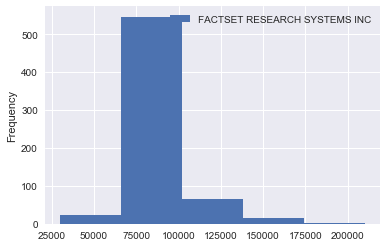

In [98]:

df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='hist', legend = True, bins=5)


### Screen on Individual Job

In [98]:
#import numpy as np
#filter/sub-set just on a single job description
title = 'FINANCIAL ENGINEER'
position1 = df_[df_['JOB TITLE'] == title]
position1.describe()

,BASE SALARY
count,46.00000
mean,95928.73913
std,28954.11838
min,40500.00000
25%,85000.00000
50%,90000.00000
75%,94291.50000
max,230000.00000


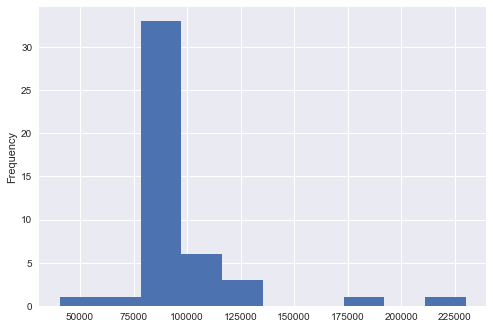

In [99]:
%matplotlib inline
import seaborn as sns
sns.set()

position1['BASE SALARY'].plot(kind='hist', bins=10)

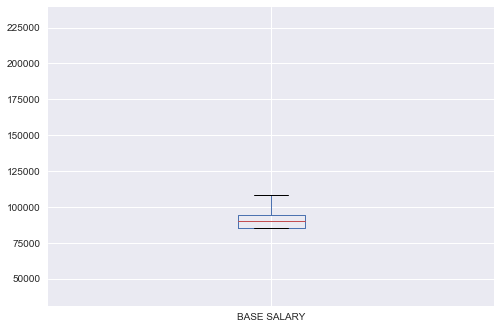

In [100]:
position1['BASE SALARY'].plot(kind='box', legend=True)

In [101]:
agglist = ('count','mean', 'min', 'max')

pd.set_option('precision',5)

#temp3 = df_.pivot_table('BASE SALARY', index = ["STATE", "EMPLOYER"], aggfunc = agglist)
result1 = position1.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

result1.sort_values('count', ascending=False)
result1

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG_,8,140277,95722,230000
FACTSET RESEARCH SYSTEMS INC,36,88611,85000,100000
ICE_,2,50250,40500,60000


### Bucketing Similar Jobs

In [95]:
#two ways to merge similar titles 
#method1
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('SOFTWARE ENGINEER')] ="SOFTWARE_ENGINEER"

#method2
df_['JOB TITLE']= df_['JOB TITLE'].apply(lambda x: "MACHINE_LEARNING" if "MACHINE LEARNING" in x else x)

##bonus groupings
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('DEVELOPER')] ="DEVELOPER_"

print(len(df_))
df_['JOB TITLE'].value_counts()

4569


C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


DEVELOPER_                                                    1496
SOFTWARE_ENGINEER                                              805
TEAM LEADER                                                    171
FINANCIAL ENGINEER                                              46
SENIOR QA ANALYST                                               40
REPORTER                                                        34
PRODUCT MANAGER                                                 32
QUANTITATIVE ANALYST                                            30
BUSINESS ANALYST                                                26
SYSTEMS ENGINEER                                                25
SENIOR ANALYST                                                  24
FIS REPRESENTATIVE                                              24
MANAGEMENT ASSOCIATE                                            24
QUALITY ASSURANCE ANALYST                                       22
EDITOR                                                        

In [100]:

#["MACHINE_LEARNING" for x in df_['JOB TITLE'].index if df_['JOB TITLE'].str.contains('MACHINE LEARNING') == True]

#mljobs = df_['JOB TITLE'].replace(df_['JOB TITLE'].str.contains('MACHINE LEARNING')==True, 'MACHINE_LEARNING')
#mljobs.value_counts()

#type(mljobs[0])
#print(mljobs.value_counts())

#df_['JOB TITLE'] = np.where(mljobs, 'MACHINE_LEARNING')
#df_[df_['JOB TITLE'] = np.where(mljobs, 'MACHINE_LEARNING')
#df_['JOB TITLE'].value_counts()

#temp = df_['JOB TITLE'].str.contains('MACHINE LEARNING').
#temp.count(df_['JOB TITLE']==True)
#position1.head(n=10)

In [109]:
#table2.sort_values('count', ascending=False)

#table2 = df_.pivot_table('BASE SALARY', index = ['EMPLOYER','JOB TITLE'], aggfunc = agglist)

#table2.sort_values('mean', ascending=False)
#table2

## Single Title for all Employers

In [40]:
url2 = 'http://h1bdata.info/index.php?em=&job=Data+Scientis&city=&year=All+Years'
url2

'http://h1bdata.info/index.php?em=&job=Data+Scientis&city=&year=All+Years'

In [42]:
content = requests.get(url2).text

In [46]:
#process the html code
soup = BeautifulSoup(content, "html.parser")
#type(soup)

#go to table body
table = soup.find("tbody")

#fetch Column headers
colnames = [tag.text for tag in soup.find("thead").find_all("th")]  

#cycle through tags and populate df with contents
webtable = pd.DataFrame(
        ((tag.text for tag in lst.find_all("td")) for lst in table.find_all("tr")),
        columns = colnames
    )

In [47]:
webtable.describe()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
count,5325,5325,5325,5325,5325,5325,5325
unique,1789,307,1241,507,946,973,3
top,MICROSOFT CORPORATION,DATA SCIENTIST,"100,000","SAN FRANCISCO, CA",03/14/2018,09/01/2018,CERTIFIED
freq,312,4512,217,702,82,113,5076


In [48]:
webtable

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016,09/02/2016,CERTIFIED
1,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED
3,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017,09/01/2017,CERTIFIED
4,YONO HEALTH INC,DATA SCIENTIST,"50,220","SUNNYVALE, CA",02/28/2017,08/28/2017,CERTIFIED
5,SRIVEN SYSTEMS OF TX INC,DATA SCIENTIST,"52,000","MADISON, WI",03/07/2018,09/02/2018,CERTIFIED
6,NECTO-NET CONTACT MANAGEMENT INC,DATA SCIENTIST,"52,300","HOUSTON, TX",03/16/2017,09/02/2017,CERTIFIED
7,THE BALMORAL GROUP LLC,DATA SCIENTIST,"58,920","WINTER PARK, FL",03/21/2018,09/20/2018,CERTIFIED
8,ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"60,000","DEARBORN, MI",06/13/2017,06/26/2017,CERTIFIED
9,ARIES APP INC,DATA SCIENTIST,"60,140","BELLEVUE, WA",03/06/2017,09/05/2017,CERTIFIED


In [49]:
#add a column call state
newcol = webtable['LOCATION'].apply(lambda x: x.split(', ') [-1])
webtable['STATE'] = newcol
webtable.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016,09/02/2016,CERTIFIED,CA
1,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED,NJ
2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015,08/20/2015,CERTIFIED,NJ
3,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017,09/01/2017,CERTIFIED,GA
4,YONO HEALTH INC,DATA SCIENTIST,"50,220","SUNNYVALE, CA",02/28/2017,08/28/2017,CERTIFIED,CA


In [53]:
webtable['BASE SALARY'] = webtable['BASE SALARY'].str.replace(',','').astype(int)

In [66]:
agglist = ('count','mean', 'min', 'max')

pd.set_option('precision',4)

#temp3 = df_.pivot_table('BASE SALARY', index = ["STATE", "EMPLOYER"], aggfunc = agglist)
result2 = webtable.pivot_table('BASE SALARY',index = ['STATE'], aggfunc = agglist)

result2.sort_values('count', ascending=False)
result2

,count,mean,min,max
STATE,,,,
AL,2,67500.0000,60000,75000
AR,10,88060.3000,70000,109698
AZ,33,95947.6970,55661,150000
CA,2205,117915.8367,5769,1350001
CO,27,84094.9259,45150,135000
CT,43,91220.5116,75000,117476
DC,28,99453.9286,60000,140000
DE,5,88587.2000,60360,115000
FL,60,82244.1833,50000,162000
